In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key
from config import weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Create a set of random latitude and longitude combinations.
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)
#lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)

In [21]:
# Create a list for holding the cities.
#cities = []
# Identify the nearest city for each latitude and longitude combination.
#for coordinate in coordinates:
    #city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    #if city not in cities:
        #cities.append(city)
# Print the city count to confirm sufficient count.
#len(cities)

In [24]:
# Create an empty list to hold the weather data.
#city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

# Loop through all the cities in the list.
#for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    #record_count += 1
    
    # Run an API request for each of the cities.
    #try:
        # Parse the JSON and retrieve data.
        #city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        #city_lat = city_weather["coord"]["lat"]
        #city_lng = city_weather["coord"]["lon"]
        #city_max_temp = city_weather["main"]["temp_max"]
        #city_humidity = city_weather["main"]["humidity"]
        #city_clouds = city_weather["clouds"]["all"]
        #city_wind = city_weather["wind"]["speed"]
        #city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        #city_data.append({"City": city.title(),
                          #"Lat": city_lat,
                          #"Lng": city_lng,
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

# If an error is experienced, skip the city.
    #except:
        #print("City not found. Skipping...")
        #pass

# Indicate that Data Loading is complete.
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")


In [25]:
#print(len(city_data))

In [26]:
city_data_df = pd.DataFrame(city_data)

In [27]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [28]:
# Create the output file (csv)
output_data_file = 'weather_data/cities.csv'

# Export the City_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [29]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Biak,ID,2022-02-01 01:13:22,-0.9131,122.8766,82.78,62,99,1.88
1,Tuktoyaktuk,CA,2022-02-01 01:13:22,69.4541,-133.0374,-10.17,99,100,5.21
2,Gewane,ET,2022-02-01 01:13:23,10.1664,40.6453,71.17,39,71,5.66
3,Kodiak,US,2022-02-01 01:13:23,57.7900,-152.4072,29.71,86,100,4.61
4,Beyneu,KZ,2022-02-01 01:13:23,45.3167,55.2000,33.42,81,29,13.56
...,...,...,...,...,...,...,...,...,...
588,Cacule,BR,2022-02-01 01:28:43,-14.5033,-42.2222,68.45,95,100,1.97
589,Kismayo,SO,2022-02-01 01:28:43,-0.3582,42.5454,76.91,79,100,11.43
590,Solnechnyy,RU,2022-02-01 01:28:43,50.7214,136.6319,2.43,93,98,2.17
591,Dingle,PH,2022-02-01 01:28:44,10.9995,122.6711,79.75,81,100,11.54


In [30]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

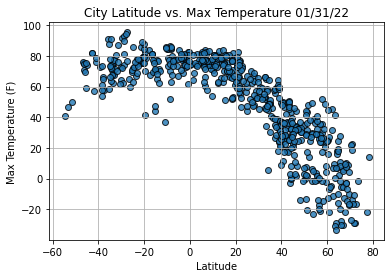

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temp,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorperate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

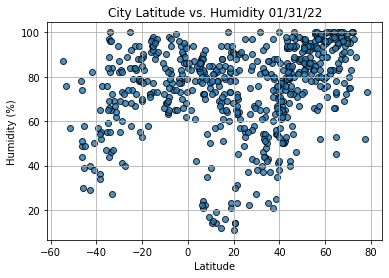

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           humidity,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorperate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

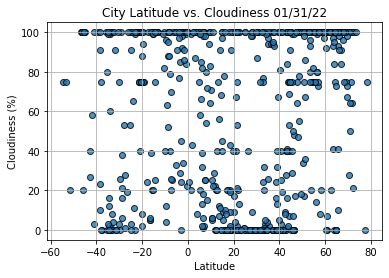

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           cloudiness,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorperate the other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

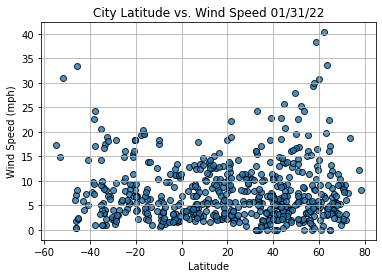

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           wind_speed,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorperate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()